In [74]:
from warnings import filterwarnings
filterwarnings('ignore')

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [76]:
df = pd.read_csv('data/dubai edited.csv')
df.head()

,Transaction_Type,Registration_type,Area,Property_Type,Property_Sub_Type,Amount,Property_Size,Bedrooms,Parking,Nearest_Metro,Nearest_Mall,Nearest_Landmark,Project
0,Sales,Off-Plan,BUSINESS BAY,Unit,Flat,2631000,105.75,2,Yes,Business Bay Metro Station,Dubai Mall,Downtown Dubai,AYKON CITY 3
1,Sales,Off-Plan,Al Wasl,Unit,Flat,3309000,161.32,2,Yes,NaN,NaN,NaN,Fern
2,Sales,Off-Plan,JUMEIRAH LAKES TOWERS,Unit,Flat,1170137,99.64,2,Yes,Damac Properties,Marina Mall,Burj Al Arab,SEVEN CITY JLT
3,Sales,Off-Plan,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,590000,63.95,1,Yes,Dubai Internet City,Marina Mall,Sports City Swimming Academy,Binghatti Corner
4,Sales,Off-Plan,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,600000,61.36,1,Yes,Dubai Internet City,Marina Mall,Sports City Swimming Academy,Binghatti Corner


In [77]:
x = df.drop(columns=['Amount'])
y = df[['Amount']]

In [78]:
cat = list(x.columns[x.dtypes=='object'])
cat

['Transaction_Type',
 'Registration_type',
 'Area',
 'Property_Type',
 'Property_Sub_Type',
 'Parking',
 'Nearest_Metro',
 'Nearest_Mall',
 'Nearest_Landmark',
 'Project']

In [79]:
con = list(x.columns[x.dtypes!='object'])
con

['Property_Size', 'Bedrooms']

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
con_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [82]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='Not_Avail')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [83]:
pre = ColumnTransformer([('con', con_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [84]:
x_pre = pre.fit_transform(x)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pre, y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((35794, 1331), (8949, 1331))

In [86]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [87]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boost": GradientBoostingRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1425319.2594
- Mean Absolute Error: 588204.5366
- R2 Score: 0.8794
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2241623462578699.2500
- Mean Absolute Error: 51460601135936.1875
- R2 Score: -132909079888586480.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1425266.9526
- Mean Absolute Error: 587615.6883
- R2 Score: 0.8794
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3208793.8225
- Mean Absolute Error: 653411.6667
- R2 Score: 0.7277


Ridge
Model performance for Training set
- Root Mean Squared Error: 1441923.9554
- Mean Absolute Error: 600683.7961
- R2 Score: 0.8766
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3157415.3952
- Mean Absolute Error: 654585.0887
- R2 Score: 0.7363


K-Neighbors Regressor
Model performance for Training set
- Roo

In [88]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,7.363105e-01
1,Lasso,7.276590e-01
7,CatBoosting Regressor,6.810927e-01
5,Random Forest Regressor,6.782472e-01
6,XGBRegressor,6.754187e-01
9,Gradient Boost,6.614746e-01
4,Decision Tree,6.573890e-01
3,K-Neighbors Regressor,6.008859e-01
8,AdaBoost Regressor,5.903212e-01
0,Linear Regression,-1.329091e+17


In [89]:
lin_model = Ridge(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 73.63


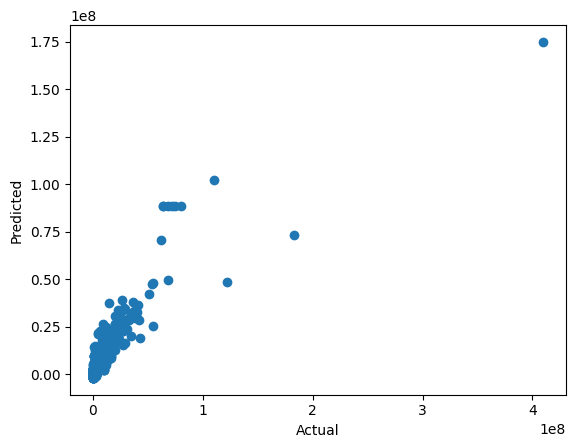

In [90]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

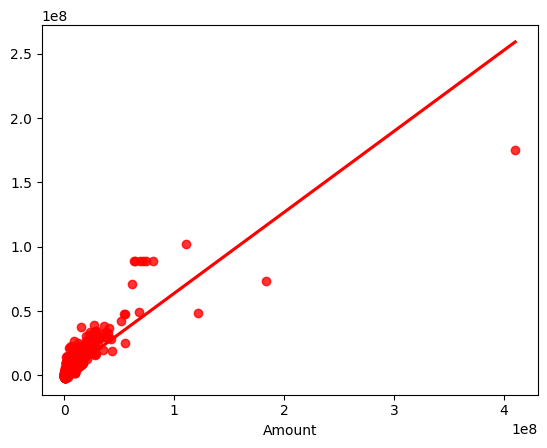

In [91]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [92]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

ValueError: Per-column arrays must each be 1-dimensional